# Examples week 4
## Lesson 7

### Printing complex data types

In [1]:
# When you have a complicated data structure, like a deeply nested dictionary and/or list,
# it's useful to inspect it. There are mulitple ways to do that. One of them is using 
# the pprint module
import pprint
nested_dict = { "titles" : { "languages" : { "en" : "A title " } } } # Three levels deep!
pprint.pprint(nested_dict)

{'titles': {'languages': {'en': 'A title '}}}


In [2]:
# However, for nested data structures, i think the json module is actually 
# more useful
import json
print(json.dumps(nested_dict, indent = 4))

{
    "titles": {
        "languages": {
            "en": "A title "
        }
    }
}


In [3]:
# The 'indent' argument specifies how much spaces you want after every new nested structure
print(json.dumps(nested_dict, indent = 2)) # 2 instead of 4

{
  "titles": {
    "languages": {
      "en": "A title "
    }
  }
}


### Pandas

In [4]:
# Pandas is a library to do analysis on data sets
# You need to import pandas, but you give it another name, because programmers are lazy
import pandas as pd # Note 'as pd', you now use 'pd' instead of 'pandas'

# You've already seen many variable types, most prominently dicts and lists, pandas introduces its own
# datatypes: the one-dimensional Series, and the multi-dimensional DataFrame.

# Let's look at the Series first, you can create a series from any list of values
data = [5, 1, 8, 2, 2, 5, 2, 3, 6, 2, 3, 9, 1, 12, 2]
series = pd.Series(data)

# Pandas automatically creates an index starting at zero, just like a regular list
series

0      5
1      1
2      8
3      2
4      2
5      5
6      2
7      3
8      6
9      2
10     3
11     9
12     1
13    12
14     2
dtype: int64

In [5]:
# To get just the values again use the 'values' attribute
series.values

array([ 5,  1,  8,  2,  2,  5,  2,  3,  6,  2,  3,  9,  1, 12,  2])

In [6]:
# And for indexes, just use 'index'
series.index

RangeIndex(start=0, stop=15, step=1)

In [7]:
# Pandas has a lot of methods you can use on its Series and DataFrames. 
print(series.max()) # Largest value

print(series.min()) # Smallest value

print(series.mean()) # Average value

print(series.median()) # Median value

print(series.sum()) # Sum of all values

12
1
4.2
3.0
63


In [8]:
# Another really useful feature is value_counts(), which counts the times a value
# occurs in a series
print(series.value_counts())

2     5
5     2
3     2
1     2
12    1
9     1
8     1
6     1
dtype: int64


In [9]:
# Using the head() and tail() methods you can view the first and last entries,
# by default the first five (head) or last five (tail)
series.head()

0    5
1    1
2    8
3    2
4    2
dtype: int64

In [10]:
# If you give a number in head() or tail() you're getting that many entries
series.tail(10)

5      5
6      2
7      3
8      6
9      2
10     3
11     9
12     1
13    12
14     2
dtype: int64

In [11]:
# DataFrames add one or more Series together, a lot like an Excel sheet. Or in 
# Python terms: a list with dicts
data = [
    { "name" : "Tinus", "species" : "hamster", "age" : 7 }, # Note how we put this dict on one line for brevity
    { "name" : "Barrie", "species" : "monkey", "age" : 5 },
    { "name" : "Hans", "species" : "badger", "age" : 12 }
]

df = pd.DataFrame(data) # 'df' is another convention, an abbrevation for dataframe
df # This will show a fancy table in Jupyter Notebooks

age    name  species
0    7   Tinus  hamster
1    5  Barrie   monkey
2   12    Hans   badger

In [12]:
# To inspect one column only, you can use the [] notation, just like a dict or list
df["age"]

0     7
1     5
2    12
Name: age, dtype: int64

In [13]:
# And because this column is a series, you can use the same methods that we've used before
print(df["age"].mean())
print(df["age"].sum())

8.0
24


In [14]:
# Pandas has methods for importing structered data formats like CSV, JSON and Excel
# They also convert directly to dataframes. Let's try importing a CSV file that contains
# the names of all children born in 2014, including gender and number of times a name was given
df = pd.read_csv("svb-names-2014.csv")
df.head() # Show the first five names

name  number  gender
0  Sophie     836       1
1    Daan     751       0
2    Emma     728       1
3    Bram     727       0
4   Milan     700       0

In [15]:
# To save a DataFrame back to a file you can use the to_* methods, like to_json and to_csv

In [16]:
df = pd.read_csv("svb-names-2014.csv")
df.to_json("svb-names-2014.json")

### Filtering and sorting data

In [17]:
# As you can see this list is ordered on the number of times a name is given
# The 'gender' column indicates whether the child was a boy (0) or a girl (1)
df["gender"].value_counts()

1    13402
0    11657
Name: gender, dtype: int64

In [18]:
# Pandas uses the bracket syntax ([]) to filter the data as well, for example, this
# is how we only get the top 3 boys names
df[df["gender"] == 0].head(3) # Remember that head shows the first x items from the beginning

name  number  gender
1   Daan     751       0
3   Bram     727       0
4  Milan     700       0

In [19]:
# And here are the girls names
df[df["gender"] == 1].head(3)

name  number  gender
0  Sophie     836       1
2    Emma     728       1
8   Julia     676       1

In [20]:
# Pandas DataFrames also have a query() method that might be more intuitive
df.query("gender == 1").head(3)

name  number  gender
0  Sophie     836       1
2    Emma     728       1
8   Julia     676       1

In [21]:
# We can also add a new column to the dataset, simply by assigning it and specifying the
# values. Note that this 'broadcasts' to the entire dataset, it's basically like 
# doing a for loop.
# Let's add a column that adds the length of the name
df["name_length"] = df["name"].str.len()
df.head()

name  number  gender  name_length
0  Sophie     836       1            6
1    Daan     751       0            4
2    Emma     728       1            4
3    Bram     727       0            4
4   Milan     700       0            5

In [22]:
# And now, let's sort the list by this new column, so we can see what is the longest name
# given to a child born in 2004
df.sort_values("name_length").head()

name  number  gender  name_length
9264    Al       1       0            2
13128   Li       1       0            2
24308   To       1       1            2
12463   Ji       1       0            2
16220   Yk       1       0            2

In [23]:
# Ah! We get shortest instead, because sort_values by default sorts ascending (low to high), 
# let's fix that
df.sort_values("name_length", ascending=False).head()

name  number  gender  name_length
24495  Vlinder-Jezzebelle       1       1           18
10114  D'Angelo-Valentino       1       0           18
11434  Ghëarmiangelijanno       1       0           18
16848   Angenieta-Jantina       1       1           17
10669   Djievano-Sonnekay       1       0           17

In [24]:
# You can also do string operations, for example, 
# let's see the most popular double names (names with a dash)
df[df["name"].str.contains("-")].sort_values("number", ascending=False).head()

name  number  gender  name_length
1711  Anne-Sophie      14       1           11
1911    Jazz-Lynn      12       1            9
2027   Anne-Fleur      11       1           10
2143      Jay-Jay      10       0            7
2183    Anne-Lynn      10       1            9

In [25]:
# We can use filtering with multiple conditions as well, 
# let's find out all girls names that start with 'Piet'
df[(df["name"].str.startswith("Piet")) & (df["gender"] == 1)] # Note the brackets and the & operator

name  number  gender  name_length
1458   Pieternella      17       1           11
5769     Pietertje       3       1            9
8630     Pieternel       2       1            9
22779        Pieta       1       1            5

In [26]:
# The 'groupby' method can be very handy to apply operations on a series of values, for example to sum() 
# both genders in the dataset, you can try this
df.groupby("gender").sum()

number  name_length
gender                     
0        88765        70761
1        84851        86063

In [27]:
# Combining a couple of methods we've learned now let's do something complex
# Let's find out the most populair initial letter for names.
# First we need an extra column that just has the first letter of the name in the row
df["first"] = df["name"].str[0]

# Now we group by this letter, sum all the values in the 'number' column, sort them with highest value first
# and the print the first five results
df.groupby("first")["number"].sum().sort_values(ascending = False).head()

first
J    18913
L    16394
M    16183
S    15491
A    11697
Name: number, dtype: int64

### Advanced ways to transform data with `apply()`

In [28]:
# We've already seen many ways to transform or extract data, 
# like the string operations in the previous chapter. 
# But what if we want to do something more complex that isn't available in Pandas by default?
# For example, let's (this is a pretty contrived example) we want to remove all vowels from the names 
# in our dataframe. Usually we would use something like a for loop for that
names_without_vowels = []
VOWELS = ["a", "e", "o", "i", "u", "y"] # Remember that constants are capitalized by convention

for name in df["name"].values:
    for vowel in VOWELS:
        name = name.lower().replace(vowel, "") # Remember that we also need to check for uppercase vowels!
        
    names_without_vowels.append(name.capitalize()) # And re-capitalize again
    
df["name_without_vowels"] = names_without_vowels # When assigning a list to a new column, it becomes a series
df.head()

name  number  gender  name_length first name_without_vowels
0  Sophie     836       1            6     S                 Sph
1    Daan     751       0            4     D                  Dn
2    Emma     728       1            4     E                  Mm
3    Bram     727       0            4     B                 Brm
4   Milan     700       0            5     M                 Mln

In [29]:
# Pandas makes this a lot easier by using the apply() method in combination 
# with a user defined function. In many languages this is called 'mapping': you
# apply a function to all the values in a list

# Let's rewrite the above example using apply(), first we define the vowels again
VOWELS = ["a", "e", "o", "i", "u", "y"]

# Then we write a function, Note that we accept one argument (the name)
# and return the name
def devowelize(name):
    for vowel in VOWELS:
        name = name.lower().replace(vowel, "")
        
    return name

# Then we can use the apply method, we give it the function, apply()
# will now run this function on all names and create a new Series, 
# which we can then apply to the column
df["name_without_vowels"] = df["name"].apply(devowelize)
df.head()

name  number  gender  name_length first name_without_vowels
0  Sophie     836       1            6     S                 sph
1    Daan     751       0            4     D                  dn
2    Emma     728       1            4     E                  mm
3    Bram     727       0            4     B                 brm
4   Milan     700       0            5     M                 mln

## Lesson 8
### The Reddit API using the `praw` library

In [30]:
# In week 3 you've learned to work with the Wikipedia REST API. Many other sites also 
# have an API, such as Reddit. This API uses authentication, which means it's a bit harder than the
# Wikipedia API to use. Because of that, it's easier to use a library to do the difficult stuff for you. 
# We're going to use the 'praw' library. To install it, open a terminal and type 'pip install praw'
# 
# You first need to create credentials for this app, and you also need to make a Reddit account first. 
# After that, follow this tutorial (http://www.storybench.org/how-to-scrape-reddit-with-python/)
# until the heading about the 'shebang line'.
#
# To use praw, we first need to import the library
import praw

In [31]:
# We need to define two 'keys' to use with the Reddit API. These are supposed to be secret, 
# so enter them here, don't share them with anyone! We also need a 'user agent string', 
# simply replace the place where it says 'YOUR_NAME' with your Reddit username
#
# Note how we CAPITALIZE the variable names. This is a convention
# to indicate that these are 'constants' and shouldn't be changed
CLIENT_ID = "CLIENT_ID_HERE"
CLIENT_SECRET = "CLIENT_SECRET_HERE"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/YOUR_NAME)"

In [32]:
# Okay! Now we can create an instance of the api by using this command
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [33]:
# To test the api, see if this returns 'True'
api.read_only

True

In [34]:
# Let's try getting the 10 'hottest' submission on the popular 'Ask Reddit' subreddit
# Note the 'limit' argument, we can pass these with an equals sign, just like variable declaration
submissions = api.subreddit('askReddit').hot(limit = 10)
submissions

In [35]:
# As you can see this is an 'iterator', we can use 'for' to loop through these submissions
for sub in submissions:
    # Note how these objects don't use dictionaries, and you access
    # data by the dot notation. These data points are called object attributes.    
    print(sub.title)
    
    # You can even get a nested property this way
    print(sub.author.name)

Add "ing" to the end of a movie title, what is the movie about now?
thebrownkid
What’s something that’s really useful on the internet that most people don’t know about?
forestdragon04
Prison guards of Reddit, what is the most wholesome thing you have ever seen happen in your prison?
plankus_
What is your most NSFW story about walking in on someone doing the dirty or being walked in on?
InspireAlarmAffector
Make-A-Wish recipients and workers, what were some wishes you HAD to say no to?
abeannis
What's your best "Fire me, I fucking dare you" moment from work?
AssTasticBooty
Doctors and nurses, what are the weirdest last words you've heard?
InevitableWish
With 2018 ending soon, what event would perfectly bring this year to a close?
axlhazarika
If by any chance a Death Note came to your possession, how long would it take for you to write something? Who is it? And whats the cause of death?
dcrui53
Look out your window. What do you see?
theserottendays


In [36]:
# Note that when you want to use the data from the Praw library in Pandas you need to convert it first to 
# a list with dictionaries
results = api.subreddit('askReddit').hot(limit = 10)
submissions = []
for result in results:
    submissions.append({
        "title" : result.title,
        "score" : result.score,
        "comments" : result.num_comments
    })

In [37]:
df = pd.DataFrame(submissions)
df.head()

comments  score                                              title
0     11875  36685  Add "ing" to the end of a movie title, what is...
1      2147   8980  What’s something that’s really useful on the i...
2      1102   6112  Prison guards of Reddit, what is the most whol...
3      1332   1702  What is your most NSFW story about walking in ...
4       615   1155  Make-A-Wish recipients and workers, what were ...

In [38]:
# There are lots of properties ('attributes') that come with every submission, you can use python's vars() 
# method to check them out. We need to convert the submissions to a list first to do that. We also need to
# re-do the method, because a 'generator' is over after one go
submissions = api.subreddit('askReddit').hot(limit = 10)
submissions = list(submissions)
vars(submissions[0])

{'_reddit': <praw.reddit.Reddit at 0x115e874e0>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='AskReddit'),
 'selftext': '',
 'author_fullname': 't2_68nt0',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 2,
 'clicked': False,
 'title': 'Add "ing" to the end of a movie title, what is the movie about now?',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/AskReddit',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': None,
 'downs': 0,
 'parent_whitelist_status': 'all_ads',
 'hide_score': False,
 'name': 't3_9wojev',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 36704,
 'domain': 'self.AskReddit',
 'media_embed': {},
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_media_domain': False,
 'is_meta': False,
 'category': None,
 'secure_media_embed': {},
 'link_flair_text': None,
 'can_mod_post'

In [39]:
# Another way is to use the .json 'endpoint' that is available for most Reddit URLS, for example
# this page:
# < https://www.reddit.com/r/askreddit >
# Is also available in the JSON format like this:
# < https://www.reddit.com/r/askreddit.json?limit=10 >

In [40]:
# To get the comments for a submission you can use the 'comments' attribute of a submission,
# we do need to a little magic to filter out the comments that aren't really comments
# but 'read more' buttons
# We're just going to take the first submission from the list as an example
for comment in submissions[0].comments:
    # Check if this is a 'more comments' node, skip those
    # 'continue' wil go through the next loop
    if isinstance(comment, praw.models.MoreComments):
        continue
        
    # Limit the body text to the first 100 chars
    print(comment.body[0:100])

Thoring

A documentary on Mike Tyson finally getting his pilot's license.
Jack Frosting - A tale of a cake decorator.
The Ringing. 

What was a story of a scary girl crawling out of the TV becomes tinnitus coming out o
Ghosting. Patrick Swayze is the one who doesn't know how to say goodbye.
Dude, Where’s My Caring? 
Robocoping: The Rise of Family Therapy Robots
Reign of Firing:  A consultant, nicknamed "The Dragon" presides over the downsize of a fortune 500 c
The Land Before Timing.  A very awkward and frustrating place.
Speed=>Speeding. Same movie but a cop car chases the bus for the entire movie and gives a ticket to 
E.Ting

&#x200B;

A documentary about eating habits around the world and how alien those habits may 
The Breakfast Clubbing. A group of young teens discover that they each are special in their own way 
*Fifty Shades of Greying*

Follows a dude's misadventures and the life lessons learnt after he wakes
Die Harding - Nancy Kerrigan strikes back.
*Ice Aging* is a boring d

### Visualisations: bar chart

In [41]:
# Pandas has built-in visualisations (called 'plots') using the matplotlib library
# Let's make a bar chart showing the number of boys and girls names from the CSV file 
# we used earlier
df = pd.read_csv("svb-names-2014.csv")

# First we need to use our old friend value_counts() to get the number of boys (gender == 0)
# and girls (gender == 1)
genders = df.gender.value_counts()

# Now we can use plot to get a bar chart
genders.plot(kind = 'bar')

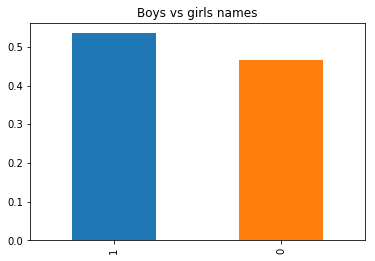

In [42]:
# This is nice, but we're missing a couple of things: we'd rather have percentages instead
# of values. A title would be nice. And finally we should have 'girl' and 'boy' instead of '1' and '0'
# Let's start with the values, we can use normalize = True to get normalized values,
# also let's add a title in the plot() method
genders = df.gender.value_counts(normalize = True)
genders.plot(kind = 'bar', title = 'Boys vs girls names')

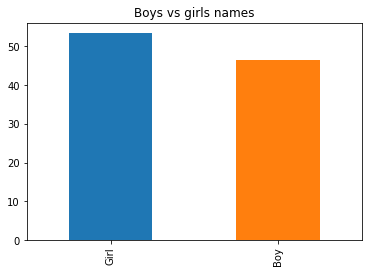

In [43]:
# Better! However, those fractions are a bit hard too read, Let's multiply by 100 to get percentages
genders = genders * 100

# We also want 'girl' and 'boys' instead of '1' and '0',
# we can do that by changing the index of the Series
genders.index = ['Girl', 'Boy']

# Awesome. Let's plot again!
genders.plot(kind = 'bar', title = 'Boys vs girls names')

### Visualisations: histogram

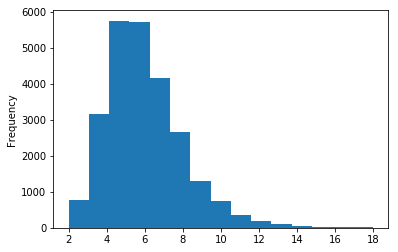

In [44]:
# A histogram is another type of visualisation that groups values together,
# using a histogram we can show how name length is distributed
# First we make a new column containing string length
df["name_length"] = df["name"].str.len() # Note how we need to use 'str' first

# Now we can create a histogram, we do this by giving 'hist' as the argument to the 
# plot() method and indicating the number of bins
# Try changing the number of bins and see what happens
df["name_length"].plot(kind = 'hist', bins = 15)

### Working with temporal data

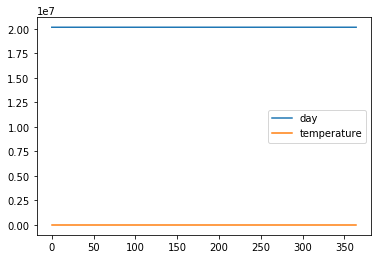

In [45]:
# Temporal data is data with specific moments or periods in time
# Let's look at an example: temperatures as measured in De Bilt (close to Utrecht)
# First let's load the data, this contains one column ('day') with dates, and one column
# with the average temperature on that day
temp = pd.read_csv("temperatures.csv")

# Let's plot this data, note that just using 'plot' uses the line chart by default,
# which is what we want
temp.plot()

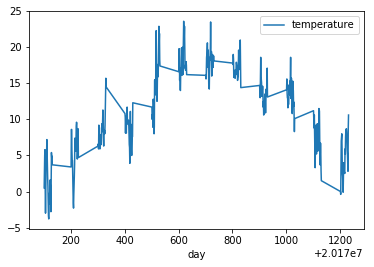

In [46]:
# That looks weird, but this is because it interprets the index as the x-ax, and the columns
# with the dates and temperatures as two lines to plot, let's fix that by putting the
# the dates on the x-ax
temp.plot(x = 'day')

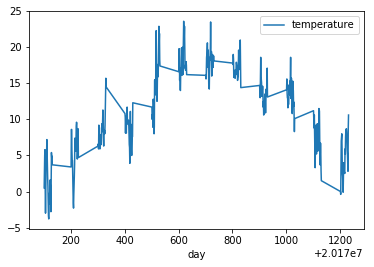

In [47]:
# Another option would be to tell the read_csv method that we want the first column as the index
temp = pd.read_csv("temperatures.csv", index_col=0)
temp.plot()

In [48]:
# Data is now plotted on the correct axes, but the graphic still looks weird.
# You can see from the x-ax what's going on: Pandas interprets the dates as 
# integers instead of dates! We need to fix that by letting pandas know it's a date.
# We can do that from the import, so let's adapt our read_csv statement once again

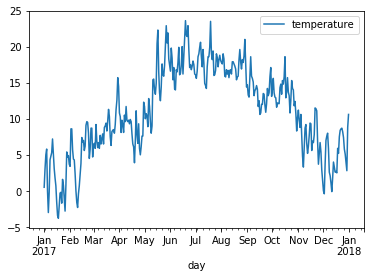

In [49]:
temp = pd.read_csv("temperatures.csv", index_col=0, parse_dates=True)
temp.plot()

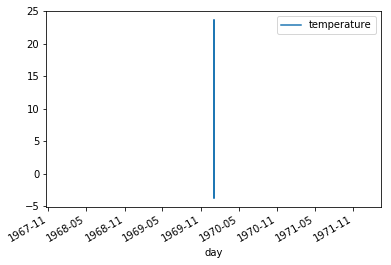

In [50]:
# Note that you can also use pd.to_datetime() to achieve the same effect
df = pd.read_csv("temperatures.csv", index_col = 0)
df.index = pd.to_datetime(df.index)
df.plot()

In [51]:
# Hmm.. this is not working, what's going on?
df.head()

temperature
day                                       
1970-01-01 00:00:00.020170101          0.5
1970-01-01 00:00:00.020170102          3.0
1970-01-01 00:00:00.020170103          5.0
1970-01-01 00:00:00.020170104          5.8
1970-01-01 00:00:00.020170105          0.0

In [52]:
# Okay, our dates are not properly formatted, because the pd.to_datetime() 
# interprets the 'day' column as numbers, not as dates
df = pd.read_csv("temperatures.csv")
df["day"].dtype

dtype('int64')

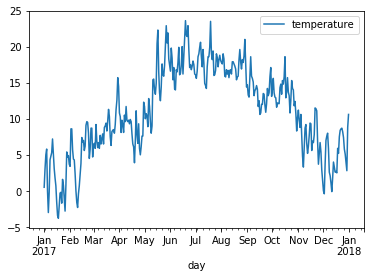

In [53]:
# We can fix that like this:
df = pd.read_csv("temperatures.csv", index_col = 0)
df.index = pd.to_datetime(df.index.astype(str))
df.plot()

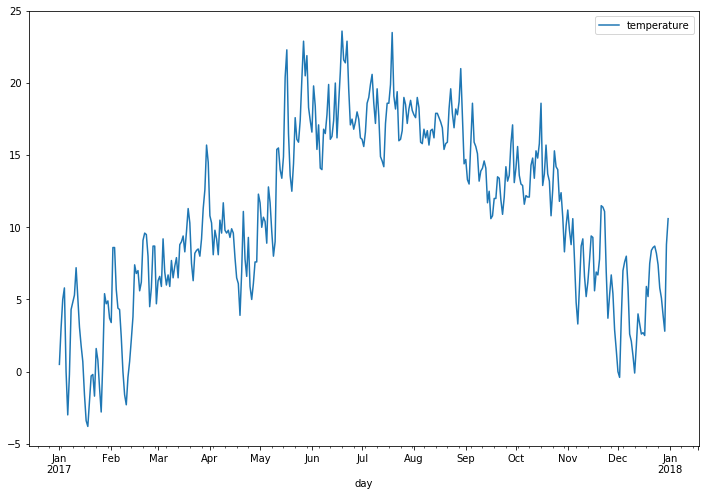

In [54]:
# Excellent, let's make it a bit bigger by using the figsize argument
df.plot(figsize = [12,8])

### Resampling and combining data

In [55]:
# We now know how to load a CSV files with temporal data, but what if we don't want to show
# the temperatures per day, but on average per month?
# For that we need to resample
# First, let's load the csv file again
temp = pd.read_csv("temperatures.csv", index_col=0, parse_dates=True)

# Now we need to use the resample() method with the dataframe and a resampling rule. In this case,
# 'M' stands for month
temp_monthly = temp.resample("M")
print(temp_monthly)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


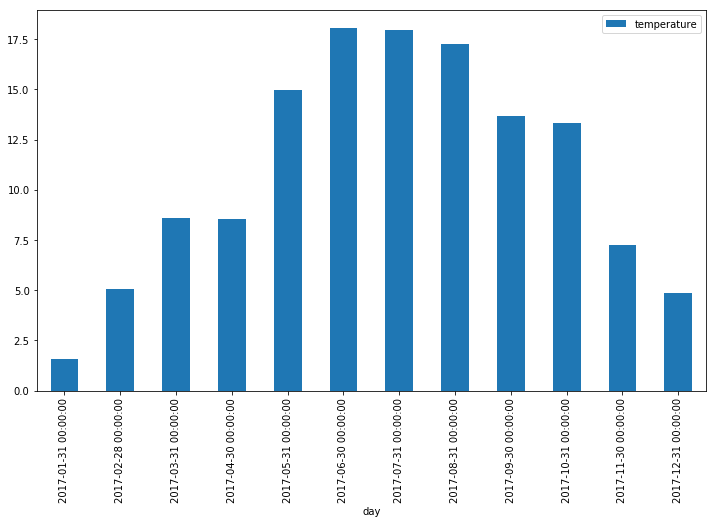

In [56]:
# This only gives a 'resampler', but it doesn't give any values yet. We need to tell pandas
# what to do with the data it now has contained for every month. Let's get the mean (average)
# of every month
temp_monthly.mean()

# That's more like it, now we can simply use plot() again, and let's use a
# bar chart, because that is a bit nicer on the eyes, also let's make this plot a bit bigger
temp_monthly.mean().plot(kind='bar', figsize = (12,7))

In [57]:
# Here's an exercise: in this folder there's a csv file called 'temperatures-average.csv'
# This file contains the highest, average and lowest temperatures measured in the last
# 300 years per month. 
# Load this file and combine the 'average' column with the existing 'ts' dataframe, and
# plot the average temperature together with the 2017 values as a bar chart so you can compare
# 2017's temperatures with the average temperature